In [2]:
import requests,json,os,sys,time,re
import matplotlib.pyplot as plt
import pickle
import copy
import ast
import itertools
import seaborn as sns
from collections import Counter
import datetime
import statistics as st
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px

In [3]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)

### Data

In [4]:
user_FE = pd.read_csv('/mnt/d/lighthouse/Final_data/user_FE.csv', header = 0)
user_FE

,user,apps_owned,total_playtime,total_window_playtime,total_mac_playtime,total_linux_playtime,total_playtime_2week,apps_not_played,top1,top2,top3,top1_time,top2_time,top3_time,top_lang,med_lang,low_lang,top_dev,med_dev,low_dev,top_pub,med_pub,low_pub,top_cat,med_cat,low_cat,top_gen,med_gen,low_gen,top_price,top_rec,top_pack,num_friends,group,hierarchical,hierarchical_2
0,76561197960265754,1677,82951,72499,1,1723,1754.0,1571.0,1085660.0,1286830.0,9900,55133.0,7322.0,5377,3,9,5,0,1,2,0,1,2,6,4,15,2,2,5,0.00,80758.0,15.0,0,1,2,0
1,76561197960268122,213,753768,128745,1352,0,10099.0,123.0,730.0,440.0,21660,652111.0,24175.0,15931,3,10,37,2,2,0,2,2,0,4,7,20,3,0,2,19.99,2875378.0,7.0,393,2,3,1
2,76561197960269041,52,83011,12827,0,0,3085.0,24.0,730.0,379720.0,261640,52333.0,10010.0,5956,3,15,23,2,4,0,2,4,0,7,9,12,3,1,1,64.98,2968728.0,6.0,72,1,0,1
3,76561197960269396,594,203558,12940,0,0,275.0,253.0,39120.0,578080.0,238960,42074.0,10107.0,9012,3,10,11,0,1,2,0,1,2,2,5,17,5,2,5,36.99,1307556.0,2.0,125,1,0,0
4,76561197960270781,1053,464703,108966,0,0,4265.0,587.0,250820.0,1085660.0,570,53200.0,27288.0,26401,3,15,42,2,0,1,2,0,1,3,3,16,3,1,2,0.00,94831.0,7.0,161,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10153,76561199068541494,4,4706,4706,0,0,52.0,0.0,730.0,431960.0,466240,3821.0,605.0,166,3,15,38,1,1,2,1,1,2,4,6,14,5,0,6,4.99,3080442.0,4.0,14,1,0,1
10154,76561199069688064,50,24220,24220,0,0,2113.0,18.0,381210.0,444090.0,945360,5620.0,3077.0,2993,3,9,12,0,0,3,0,0,3,3,7,21,3,0,1,27.68,411068.0,4.0,20,0,1,0
10155,76561199072788332,8,11089,11089,0,0,2518.0,0.0,730.0,945360.0,431960,9256.0,1469.0,117,3,11,32,1,1,2,1,1,2,3,4,18,4,0,5,10.68,3207857.0,5.0,25,1,0,1
10156,76561199076436762,25,18587,18587,0,0,2159.0,13.0,440.0,250820.0,221100,12242.0,2933.0,1667,3,15,41,3,0,0,3,0,0,1,5,17,3,0,2,59.99,212981.0,4.0,49,2,0,0


In [245]:
user_FE['top_game'] = user_FE[['top1', 'top2', 'top3']].values.tolist()
user_FE['similar'] = '[]'
user_FE['similar'] = user_FE['similar'].apply(lambda x : ast.literal_eval(x))
# user_FE.loc[0,'similar'] = 0
user_FE

,user,apps_owned,total_playtime,total_window_playtime,total_mac_playtime,total_linux_playtime,total_playtime_2week,apps_not_played,top1,top2,top3,top1_time,top2_time,top3_time,top_lang,med_lang,low_lang,top_dev,med_dev,low_dev,top_pub,med_pub,low_pub,top_cat,med_cat,low_cat,top_gen,med_gen,low_gen,top_price,top_rec,top_pack,num_friends,group,hierarchical,hierarchical_2,top_game,similar
0,76561197960265754,1677,82951,72499,1,1723,1754.0,1571.0,1085660.0,1286830.0,9900,55133.0,7322.0,5377,3,9,5,0,1,2,0,1,2,6,4,15,2,2,5,0.00,80758.0,15.0,0,1,2,0,"[1085660.0, 1286830.0, 9900.0]",[]
1,76561197960268122,213,753768,128745,1352,0,10099.0,123.0,730.0,440.0,21660,652111.0,24175.0,15931,3,10,37,2,2,0,2,2,0,4,7,20,3,0,2,19.99,2875378.0,7.0,393,2,3,1,"[730.0, 440.0, 21660.0]",[]
2,76561197960269041,52,83011,12827,0,0,3085.0,24.0,730.0,379720.0,261640,52333.0,10010.0,5956,3,15,23,2,4,0,2,4,0,7,9,12,3,1,1,64.98,2968728.0,6.0,72,1,0,1,"[730.0, 379720.0, 261640.0]",[]
3,76561197960269396,594,203558,12940,0,0,275.0,253.0,39120.0,578080.0,238960,42074.0,10107.0,9012,3,10,11,0,1,2,0,1,2,2,5,17,5,2,5,36.99,1307556.0,2.0,125,1,0,0,"[39120.0, 578080.0, 238960.0]",[]
4,76561197960270781,1053,464703,108966,0,0,4265.0,587.0,250820.0,1085660.0,570,53200.0,27288.0,26401,3,15,42,2,0,1,2,0,1,3,3,16,3,1,2,0.00,94831.0,7.0,161,1,0,0,"[250820.0, 1085660.0, 570.0]",[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10153,76561199068541494,4,4706,4706,0,0,52.0,0.0,730.0,431960.0,466240,3821.0,605.0,166,3,15,38,1,1,2,1,1,2,4,6,14,5,0,6,4.99,3080442.0,4.0,14,1,0,1,"[730.0, 431960.0, 466240.0]",[]
10154,76561199069688064,50,24220,24220,0,0,2113.0,18.0,381210.0,444090.0,945360,5620.0,3077.0,2993,3,9,12,0,0,3,0,0,3,3,7,21,3,0,1,27.68,411068.0,4.0,20,0,1,0,"[381210.0, 444090.0, 945360.0]",[]
10155,76561199072788332,8,11089,11089,0,0,2518.0,0.0,730.0,945360.0,431960,9256.0,1469.0,117,3,11,32,1,1,2,1,1,2,3,4,18,4,0,5,10.68,3207857.0,5.0,25,1,0,1,"[730.0, 945360.0, 431960.0]",[]
10156,76561199076436762,25,18587,18587,0,0,2159.0,13.0,440.0,250820.0,221100,12242.0,2933.0,1667,3,15,41,3,0,0,3,0,0,1,5,17,3,0,2,59.99,212981.0,4.0,49,2,0,0,"[440.0, 250820.0, 221100.0]",[]


In [240]:
user_FE['top1_time'].describe()['std']

161748.26089738312

In [243]:
user_FE['top2_time'].describe()['std']

58732.23086734918

In [244]:
user_FE['top3_time'].describe()['std']

40209.25843333798

In [48]:
user_FE.loc[2,'top_game']

[730.0, 379720.0, 261640.0]

In [49]:
cur_user['top1_time']

4101.0

In [246]:
it = 0
for cur in range(len(user_FE)):
# for cur in range(10):
    cur_user = user_FE.iloc[cur]
    similar = []
    for i, lst in enumerate(user_FE['top_game'][cur+1:]):
#         if (sum([i in cur_user['top_game'] for i in lst]) > 1) & (lst[0]==cur_user['top1']) & (abs(cur_user['top1_time']-user_FE.loc[i+1,'top1_time'])<161748) & (abs(cur_user['total_playtime_2week']-user_FE.loc[i+1,'total_playtime_2week'])<11717):
        if (lst[0]==cur_user['top1']) & (lst[1]==cur_user['top2']) & (lst[2]==cur_user['top3']) & (abs(cur_user['top1_time']-user_FE.loc[i+1,'top1_time'])<161748) & (abs(cur_user['top2_time']-user_FE.loc[i+1,'top2_time'])<58732) & (abs(cur_user['top3_time']-user_FE.loc[i+1,'top3_time'])<40209):
            user_FE.loc[cur,'similar'].append(user_FE.iloc[i]['user'])
#         print(i, user_FE.iloc[i]['user'], lst)
#         print(sum([i in cur_user['top_game'] for i in lst]), i, i + 1,'\n')
    print(len(user_FE.loc[cur,'similar']), it)
    it += 1

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
1 10
0 11
0 12
13 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
1 23
0 24
0 25
1 26
2 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
4 38
0 39
0 40
0 41
0 42
1 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
1 53
0 54
0 55
0 56
2 57
26 58
0 59
0 60
4 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
0 79
0 80
0 81
0 82
0 83
0 84
0 85
0 86
2 87
0 88
0 89
0 90
2 91
0 92
0 93
0 94
0 95
0 96
0 97
0 98
0 99
0 100
0 101
0 102
0 103
0 104
0 105
0 106
3 107
0 108
0 109
0 110
0 111
0 112
0 113
0 114
5 115
0 116
0 117
0 118
1 119
0 120
1 121
2 122
0 123
0 124
0 125
0 126
5 127
0 128
0 129
3 130
0 131
0 132
0 133
0 134
0 135
0 136
0 137
0 138
0 139
0 140
2 141
0 142
0 143
0 144
1 145
61 146
0 147
0 148
0 149
0 150
1 151
6 152
0 153
0 154
0 155
0 156
0 157
0 158
0 159
6 160
0 161
0 162
0 163
0 164
0 165
0 166
0 167
0 168
0 169
2 170
0 171
0 172
0 173
0 174
1 175
0 176
0 177
0 178
0 179
0 180
0 181
0 182
0 183
1 1

0 1327
0 1328
0 1329
0 1330
0 1331
0 1332
0 1333
0 1334
0 1335
2 1336
0 1337
1 1338
0 1339
0 1340
0 1341
0 1342
0 1343
0 1344
0 1345
0 1346
0 1347
0 1348
0 1349
0 1350
0 1351
0 1352
0 1353
0 1354
0 1355
0 1356
0 1357
0 1358
0 1359
0 1360
0 1361
0 1362
0 1363
0 1364
0 1365
0 1366
0 1367
0 1368
0 1369
0 1370
0 1371
0 1372
0 1373
0 1374
0 1375
0 1376
0 1377
0 1378
0 1379
0 1380
0 1381
0 1382
0 1383
0 1384
0 1385
0 1386
0 1387
0 1388
0 1389
3 1390
0 1391
0 1392
0 1393
0 1394
0 1395
2 1396
2 1397
0 1398
0 1399
0 1400
0 1401
0 1402
6 1403
0 1404
0 1405
0 1406
2 1407
0 1408
0 1409
0 1410
0 1411
0 1412
1 1413
0 1414
0 1415
0 1416
1 1417
0 1418
0 1419
0 1420
0 1421
1 1422
0 1423
0 1424
1 1425
1 1426
0 1427
0 1428
0 1429
0 1430
0 1431
0 1432
0 1433
0 1434
0 1435
4 1436
0 1437
0 1438
0 1439
0 1440
0 1441
0 1442
0 1443
0 1444
0 1445
0 1446
8 1447
0 1448
0 1449
0 1450
0 1451
0 1452
0 1453
0 1454
0 1455
0 1456
0 1457
0 1458
0 1459
0 1460
0 1461
0 1462
0 1463
1 1464
0 1465
0 1466
0 1467
1 1468
0 1469

0 2496
0 2497
0 2498
0 2499
0 2500
0 2501
0 2502
0 2503
0 2504
0 2505
0 2506
0 2507
0 2508
0 2509
0 2510
0 2511
0 2512
0 2513
2 2514
0 2515
0 2516
1 2517
0 2518
0 2519
0 2520
0 2521
0 2522
0 2523
0 2524
0 2525
0 2526
0 2527
0 2528
0 2529
0 2530
0 2531
0 2532
0 2533
0 2534
0 2535
0 2536
0 2537
0 2538
0 2539
0 2540
0 2541
0 2542
0 2543
0 2544
0 2545
7 2546
0 2547
0 2548
9 2549
2 2550
0 2551
0 2552
0 2553
0 2554
0 2555
0 2556
2 2557
0 2558
0 2559
0 2560
0 2561
0 2562
15 2563
0 2564
10 2565
0 2566
0 2567
0 2568
0 2569
2 2570
0 2571
0 2572
0 2573
2 2574
0 2575
1 2576
0 2577
0 2578
0 2579
0 2580
0 2581
1 2582
0 2583
0 2584
0 2585
0 2586
0 2587
0 2588
0 2589
0 2590
0 2591
0 2592
0 2593
0 2594
0 2595
0 2596
3 2597
0 2598
0 2599
0 2600
0 2601
0 2602
0 2603
0 2604
0 2605
0 2606
0 2607
0 2608
2 2609
0 2610
0 2611
0 2612
0 2613
0 2614
1 2615
9 2616
1 2617
0 2618
1 2619
0 2620
0 2621
0 2622
0 2623
0 2624
0 2625
0 2626
1 2627
1 2628
0 2629
0 2630
0 2631
0 2632
0 2633
0 2634
0 2635
0 2636
0 2637
0 26

3 3665
0 3666
0 3667
0 3668
1 3669
0 3670
0 3671
4 3672
0 3673
0 3674
0 3675
0 3676
0 3677
0 3678
0 3679
0 3680
0 3681
1 3682
0 3683
0 3684
0 3685
0 3686
2 3687
0 3688
0 3689
0 3690
0 3691
0 3692
0 3693
0 3694
0 3695
0 3696
9 3697
2 3698
0 3699
0 3700
1 3701
0 3702
0 3703
0 3704
1 3705
0 3706
0 3707
0 3708
9 3709
0 3710
0 3711
0 3712
0 3713
0 3714
0 3715
26 3716
0 3717
0 3718
0 3719
0 3720
0 3721
0 3722
1 3723
1 3724
0 3725
0 3726
0 3727
7 3728
0 3729
0 3730
0 3731
0 3732
0 3733
0 3734
0 3735
0 3736
0 3737
0 3738
10 3739
1 3740
0 3741
0 3742
0 3743
0 3744
12 3745
0 3746
0 3747
0 3748
4 3749
0 3750
0 3751
0 3752
0 3753
0 3754
0 3755
0 3756
0 3757
0 3758
0 3759
0 3760
0 3761
0 3762
0 3763
1 3764
0 3765
3 3766
0 3767
0 3768
2 3769
0 3770
1 3771
5 3772
2 3773
0 3774
10 3775
0 3776
0 3777
0 3778
0 3779
0 3780
0 3781
0 3782
0 3783
0 3784
0 3785
2 3786
0 3787
0 3788
0 3789
2 3790
0 3791
0 3792
0 3793
0 3794
1 3795
0 3796
0 3797
0 3798
0 3799
0 3800
0 3801
0 3802
0 3803
0 3804
0 3805
0 3806
0 

2 4834
0 4835
0 4836
3 4837
0 4838
4 4839
0 4840
0 4841
0 4842
0 4843
0 4844
0 4845
0 4846
0 4847
0 4848
1 4849
0 4850
0 4851
0 4852
0 4853
1 4854
0 4855
0 4856
0 4857
1 4858
0 4859
0 4860
0 4861
0 4862
0 4863
0 4864
3 4865
0 4866
0 4867
0 4868
0 4869
0 4870
2 4871
0 4872
1 4873
2 4874
3 4875
0 4876
0 4877
0 4878
0 4879
0 4880
1 4881
0 4882
0 4883
0 4884
0 4885
0 4886
1 4887
0 4888
0 4889
0 4890
0 4891
1 4892
0 4893
3 4894
0 4895
1 4896
0 4897
0 4898
0 4899
0 4900
0 4901
0 4902
4 4903
0 4904
0 4905
0 4906
0 4907
0 4908
0 4909
0 4910
0 4911
0 4912
0 4913
0 4914
2 4915
0 4916
0 4917
0 4918
0 4919
5 4920
0 4921
0 4922
0 4923
0 4924
0 4925
0 4926
0 4927
0 4928
0 4929
0 4930
0 4931
0 4932
0 4933
0 4934
0 4935
0 4936
0 4937
0 4938
0 4939
0 4940
0 4941
1 4942
0 4943
0 4944
0 4945
0 4946
0 4947
3 4948
0 4949
0 4950
0 4951
0 4952
0 4953
0 4954
0 4955
0 4956
1 4957
0 4958
0 4959
0 4960
0 4961
0 4962
0 4963
0 4964
8 4965
0 4966
0 4967
0 4968
0 4969
0 4970
0 4971
0 4972
0 4973
0 4974
5 4975
0 4976

4 6004
0 6005
0 6006
0 6007
0 6008
2 6009
0 6010
0 6011
0 6012
0 6013
0 6014
9 6015
1 6016
0 6017
0 6018
0 6019
4 6020
0 6021
1 6022
0 6023
0 6024
0 6025
0 6026
0 6027
0 6028
0 6029
0 6030
1 6031
0 6032
0 6033
0 6034
0 6035
0 6036
0 6037
0 6038
0 6039
1 6040
0 6041
0 6042
0 6043
8 6044
0 6045
0 6046
0 6047
0 6048
0 6049
0 6050
0 6051
2 6052
0 6053
0 6054
0 6055
0 6056
0 6057
0 6058
0 6059
0 6060
0 6061
1 6062
1 6063
0 6064
0 6065
0 6066
0 6067
0 6068
1 6069
0 6070
0 6071
0 6072
2 6073
1 6074
0 6075
0 6076
1 6077
2 6078
0 6079
0 6080
0 6081
0 6082
0 6083
0 6084
0 6085
0 6086
0 6087
0 6088
0 6089
0 6090
0 6091
0 6092
0 6093
0 6094
0 6095
0 6096
1 6097
0 6098
0 6099
0 6100
0 6101
0 6102
2 6103
0 6104
0 6105
1 6106
0 6107
0 6108
0 6109
0 6110
0 6111
0 6112
0 6113
0 6114
0 6115
0 6116
0 6117
0 6118
4 6119
0 6120
0 6121
0 6122
0 6123
0 6124
0 6125
0 6126
0 6127
0 6128
5 6129
0 6130
0 6131
1 6132
0 6133
0 6134
0 6135
0 6136
0 6137
0 6138
0 6139
0 6140
0 6141
0 6142
0 6143
0 6144
0 6145
0 6146

0 7174
0 7175
0 7176
0 7177
0 7178
0 7179
0 7180
0 7181
0 7182
0 7183
2 7184
1 7185
4 7186
0 7187
0 7188
0 7189
0 7190
1 7191
0 7192
0 7193
0 7194
0 7195
0 7196
0 7197
0 7198
0 7199
0 7200
0 7201
0 7202
0 7203
0 7204
0 7205
0 7206
0 7207
6 7208
0 7209
0 7210
0 7211
0 7212
0 7213
0 7214
0 7215
0 7216
0 7217
0 7218
0 7219
0 7220
0 7221
0 7222
0 7223
0 7224
0 7225
0 7226
0 7227
0 7228
0 7229
0 7230
0 7231
0 7232
0 7233
0 7234
0 7235
0 7236
1 7237
0 7238
3 7239
0 7240
0 7241
0 7242
0 7243
0 7244
0 7245
0 7246
0 7247
0 7248
0 7249
0 7250
0 7251
0 7252
6 7253
0 7254
0 7255
0 7256
0 7257
4 7258
2 7259
0 7260
0 7261
2 7262
1 7263
0 7264
8 7265
0 7266
0 7267
0 7268
1 7269
0 7270
0 7271
0 7272
0 7273
0 7274
0 7275
0 7276
0 7277
0 7278
0 7279
0 7280
2 7281
0 7282
0 7283
1 7284
0 7285
0 7286
0 7287
0 7288
0 7289
0 7290
0 7291
0 7292
0 7293
0 7294
0 7295
0 7296
0 7297
0 7298
0 7299
1 7300
0 7301
0 7302
0 7303
0 7304
0 7305
0 7306
4 7307
0 7308
0 7309
2 7310
0 7311
2 7312
1 7313
0 7314
0 7315
0 7316

0 8345
0 8346
0 8347
0 8348
0 8349
0 8350
0 8351
0 8352
2 8353
0 8354
1 8355
0 8356
0 8357
1 8358
1 8359
0 8360
0 8361
0 8362
0 8363
0 8364
0 8365
0 8366
0 8367
0 8368
0 8369
0 8370
0 8371
1 8372
0 8373
0 8374
0 8375
0 8376
0 8377
0 8378
1 8379
0 8380
0 8381
1 8382
0 8383
0 8384
3 8385
2 8386
0 8387
2 8388
0 8389
3 8390
0 8391
0 8392
0 8393
0 8394
0 8395
2 8396
0 8397
0 8398
0 8399
0 8400
0 8401
0 8402
0 8403
0 8404
0 8405
0 8406
0 8407
0 8408
0 8409
0 8410
0 8411
0 8412
0 8413
0 8414
1 8415
0 8416
0 8417
0 8418
0 8419
2 8420
0 8421
0 8422
0 8423
0 8424
0 8425
0 8426
0 8427
0 8428
0 8429
2 8430
0 8431
0 8432
0 8433
0 8434
2 8435
0 8436
0 8437
1 8438
0 8439
0 8440
0 8441
0 8442
0 8443
1 8444
1 8445
0 8446
0 8447
0 8448
0 8449
0 8450
0 8451
0 8452
0 8453
0 8454
0 8455
1 8456
1 8457
0 8458
0 8459
0 8460
1 8461
0 8462
0 8463
0 8464
0 8465
0 8466
0 8467
3 8468
1 8469
0 8470
0 8471
0 8472
0 8473
0 8474
0 8475
0 8476
0 8477
0 8478
6 8479
1 8480
0 8481
0 8482
0 8483
0 8484
0 8485
0 8486
0 8487

1 9516
0 9517
0 9518
0 9519
0 9520
0 9521
0 9522
0 9523
0 9524
0 9525
0 9526
0 9527
0 9528
0 9529
0 9530
0 9531
0 9532
0 9533
1 9534
1 9535
0 9536
1 9537
1 9538
0 9539
0 9540
0 9541
1 9542
0 9543
0 9544
0 9545
0 9546
0 9547
0 9548
0 9549
0 9550
0 9551
0 9552
0 9553
0 9554
0 9555
0 9556
0 9557
0 9558
1 9559
0 9560
0 9561
0 9562
0 9563
1 9564
0 9565
0 9566
0 9567
0 9568
0 9569
0 9570
0 9571
0 9572
0 9573
0 9574
8 9575
0 9576
1 9577
0 9578
0 9579
0 9580
0 9581
0 9582
0 9583
0 9584
0 9585
2 9586
0 9587
0 9588
0 9589
0 9590
0 9591
0 9592
0 9593
0 9594
0 9595
0 9596
0 9597
0 9598
0 9599
0 9600
0 9601
0 9602
0 9603
5 9604
0 9605
0 9606
0 9607
0 9608
0 9609
0 9610
0 9611
0 9612
0 9613
0 9614
0 9615
0 9616
0 9617
0 9618
0 9619
0 9620
0 9621
0 9622
0 9623
0 9624
0 9625
0 9626
0 9627
0 9628
0 9629
0 9630
0 9631
0 9632
0 9633
0 9634
0 9635
0 9636
0 9637
0 9638
0 9639
0 9640
0 9641
0 9642
0 9643
0 9644
0 9645
0 9646
0 9647
0 9648
0 9649
0 9650
0 9651
0 9652
7 9653
0 9654
0 9655
0 9656
0 9657
0 9658

In [247]:
user_FE

,user,apps_owned,total_playtime,total_window_playtime,total_mac_playtime,total_linux_playtime,total_playtime_2week,apps_not_played,top1,top2,top3,top1_time,top2_time,top3_time,top_lang,med_lang,low_lang,top_dev,med_dev,low_dev,top_pub,med_pub,low_pub,top_cat,med_cat,low_cat,top_gen,med_gen,low_gen,top_price,top_rec,top_pack,num_friends,group,hierarchical,hierarchical_2,top_game,similar
0,76561197960265754,1677,82951,72499,1,1723,1754.0,1571.0,1085660.0,1286830.0,9900,55133.0,7322.0,5377,3,9,5,0,1,2,0,1,2,6,4,15,2,2,5,0.00,80758.0,15.0,0,1,2,0,"[1085660.0, 1286830.0, 9900.0]",[]
1,76561197960268122,213,753768,128745,1352,0,10099.0,123.0,730.0,440.0,21660,652111.0,24175.0,15931,3,10,37,2,2,0,2,2,0,4,7,20,3,0,2,19.99,2875378.0,7.0,393,2,3,1,"[730.0, 440.0, 21660.0]",[]
2,76561197960269041,52,83011,12827,0,0,3085.0,24.0,730.0,379720.0,261640,52333.0,10010.0,5956,3,15,23,2,4,0,2,4,0,7,9,12,3,1,1,64.98,2968728.0,6.0,72,1,0,1,"[730.0, 379720.0, 261640.0]",[]
3,76561197960269396,594,203558,12940,0,0,275.0,253.0,39120.0,578080.0,238960,42074.0,10107.0,9012,3,10,11,0,1,2,0,1,2,2,5,17,5,2,5,36.99,1307556.0,2.0,125,1,0,0,"[39120.0, 578080.0, 238960.0]",[]
4,76561197960270781,1053,464703,108966,0,0,4265.0,587.0,250820.0,1085660.0,570,53200.0,27288.0,26401,3,15,42,2,0,1,2,0,1,3,3,16,3,1,2,0.00,94831.0,7.0,161,1,0,0,"[250820.0, 1085660.0, 570.0]",[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10153,76561199068541494,4,4706,4706,0,0,52.0,0.0,730.0,431960.0,466240,3821.0,605.0,166,3,15,38,1,1,2,1,1,2,4,6,14,5,0,6,4.99,3080442.0,4.0,14,1,0,1,"[730.0, 431960.0, 466240.0]",[]
10154,76561199069688064,50,24220,24220,0,0,2113.0,18.0,381210.0,444090.0,945360,5620.0,3077.0,2993,3,9,12,0,0,3,0,0,3,3,7,21,3,0,1,27.68,411068.0,4.0,20,0,1,0,"[381210.0, 444090.0, 945360.0]",[]
10155,76561199072788332,8,11089,11089,0,0,2518.0,0.0,730.0,945360.0,431960,9256.0,1469.0,117,3,11,32,1,1,2,1,1,2,3,4,18,4,0,5,10.68,3207857.0,5.0,25,1,0,1,"[730.0, 945360.0, 431960.0]",[]
10156,76561199076436762,25,18587,18587,0,0,2159.0,13.0,440.0,250820.0,221100,12242.0,2933.0,1667,3,15,41,3,0,0,3,0,0,1,5,17,3,0,2,59.99,212981.0,4.0,49,2,0,0,"[440.0, 250820.0, 221100.0]",[]


In [248]:
# user_SNA.csv      # 2 match in top three
# user_SNA_2.csv    # 2 match in top three AND first has to match
# user_SNA_3.csv    # 2 match in top three AND first has to match AND top1 time is within 1 standard deviation
# user_SNA_4.csv    # 2 match in top three AND first has to match AND top1 time, 2week time is within 1 standard deviation
# user_SNA_5.csv    # top three match
# user_SNA_6.csv    # top three match, and first has to match
# user_SNA_7.csv    # top three match, and first has to match, AND top1 time is within 1 standard deviation
# user_SNA_8.csv    # top three match EXACTLY
# user_SNA_9.csv    # top three match EXACTLY, and top3 times also with in 1 standard deviation

# user_FE.to_csv('/mnt/d/lighthouse/Final_data/user_SNA_9.csv')

In [139]:
# user_SNA = pd.read_csv('/mnt/d/lighthouse/Final_data/user_SNA_6.csv')
# user_SNA.drop('Unnamed: 0', axis = 1, inplace= True)
# user_SNA['similar'] = user_SNA['similar'].apply(lambda x : ast.literal_eval(x))
# user_SNA = user_SNA.explode('similar')

In [249]:
user_SNA = user_FE.explode('similar')

In [250]:
user_SNA = user_SNA[user_SNA['similar'].isnull()==False]

In [251]:
user_SNA.head()

,user,apps_owned,total_playtime,total_window_playtime,total_mac_playtime,total_linux_playtime,total_playtime_2week,apps_not_played,top1,top2,top3,top1_time,top2_time,top3_time,top_lang,med_lang,low_lang,top_dev,med_dev,low_dev,top_pub,med_pub,low_pub,top_cat,med_cat,low_cat,top_gen,med_gen,low_gen,top_price,top_rec,top_pack,num_friends,group,hierarchical,hierarchical_2,top_game,similar
10,76561197960274467,73,378548,40156,0,0,2120.0,31.0,730.0,10.0,578080,330117.0,6810.0,6807,3,13,31,2,1,1,2,1,1,2,4,16,4,0,2,48.48,4263173.0,5.0,315,0,1,1,"[730.0, 10.0, 578080.0]",76561197960876765
13,76561197960277215,56,112346,10694,0,0,743.0,22.0,730.0,570.0,578080,59645.0,21280.0,16792,3,15,46,2,1,1,2,1,1,2,5,17,4,1,3,36.99,4183872.0,6.0,105,0,1,1,"[730.0, 570.0, 578080.0]",76561197987120187
13,76561197960277215,56,112346,10694,0,0,743.0,22.0,730.0,570.0,578080,59645.0,21280.0,16792,3,15,46,2,1,1,2,1,1,2,5,17,4,1,3,36.99,4183872.0,6.0,105,0,1,1,"[730.0, 570.0, 578080.0]",76561198029152439
13,76561197960277215,56,112346,10694,0,0,743.0,22.0,730.0,570.0,578080,59645.0,21280.0,16792,3,15,46,2,1,1,2,1,1,2,5,17,4,1,3,36.99,4183872.0,6.0,105,0,1,1,"[730.0, 570.0, 578080.0]",76561198061551745
13,76561197960277215,56,112346,10694,0,0,743.0,22.0,730.0,570.0,578080,59645.0,21280.0,16792,3,15,46,2,1,1,2,1,1,2,5,17,4,1,3,36.99,4183872.0,6.0,105,0,1,1,"[730.0, 570.0, 578080.0]",76561198070310293


# Graph

In [252]:
G = nx.from_pandas_edgelist(user_SNA, 'user', "similar", ["apps_owned", "total_playtime", "total_playtime_2week","apps_not_played"])

In [253]:
# number of nodes
G.number_of_nodes()

4128

In [254]:
# number of edges
G.number_of_edges()

4749

In [255]:
# degree of each node
# average is just dividing by num of nodes
degrees = [val for (node, val) in G.degree()]
sum(degrees)/len(degrees)

2.300872093023256

In [256]:
nx.number_connected_components(G)

176

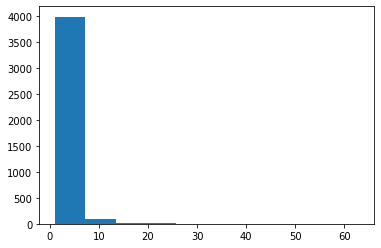

In [257]:
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees)
    plt.show()

plot_degree_dist(G)

### Degree Centrality

In [33]:
DC = nx.degree_centrality(G)
sorted(DC.items(), reverse=True)[:10]

[(76561199020819116, 0.00011507479861910241),
 (76561199012608431, 0.00011507479861910241),
 (76561198989454849, 0.00011507479861910241),
 (76561198987369549, 0.00046029919447640965),
 (76561198986828826, 0.00011507479861910241),
 (76561198964600567, 0.0003452243958573072),
 (76561198963921008, 0.00023014959723820482),
 (76561198952964843, 0.00011507479861910241),
 (76561198918307522, 0.00011507479861910241),
 (76561198876661533, 0.00023014959723820482)]

### Betweeness Centrality

In [149]:
BC = nx.betweenness_centrality(G, k = 100)
sorted(BC.items(), reverse=True)[:10]

[(76561199068541494, 0.0),
 (76561199045412824, 0.0),
 (76561199041842604, 0.0),
 (76561199038489552, 0.0),
 (76561199038202188, 0.0),
 (76561199029137691, 0.0),
 (76561199024977247, 0.0),
 (76561199020932641, 0.0),
 (76561199020819116, 0.0),
 (76561199015650383, 0.0)]

### well connected nodes

In [150]:
EC = nx.eigenvector_centrality(G)

In [151]:
sorted(EC.items(), reverse=True)[:10]

[(76561199068541494, 3.323529131860152e-05),
 (76561199045412824, 1.7563723006592917e-05),
 (76561199041842604, 2.3983068582247195e-05),
 (76561199038489552, 1.6457644584776514e-05),
 (76561199038202188, 3.323529131860152e-05),
 (76561199029137691, 4.46648596221901e-05),
 (76561199024977247, 1.898965979751221e-05),
 (76561199020932641, 4.927109762041532e-05),
 (76561199020819116, 5.0159121649752804e-05),
 (76561199015650383, 1.8086923005723074e-05)]

### communities

In [152]:
from networkx.algorithms.community import k_clique_communities

In [153]:
kcc = list(k_clique_communities(G, 9))

In [154]:
len(kcc)

0

### plotting?

In [258]:
H = nx.convert_node_labels_to_integers(G)

In [259]:
all_nodes = list(H.nodes)

In [260]:
len(all_nodes)

4128

In [267]:
sub_H = H.subgraph(all_nodes[:1000])

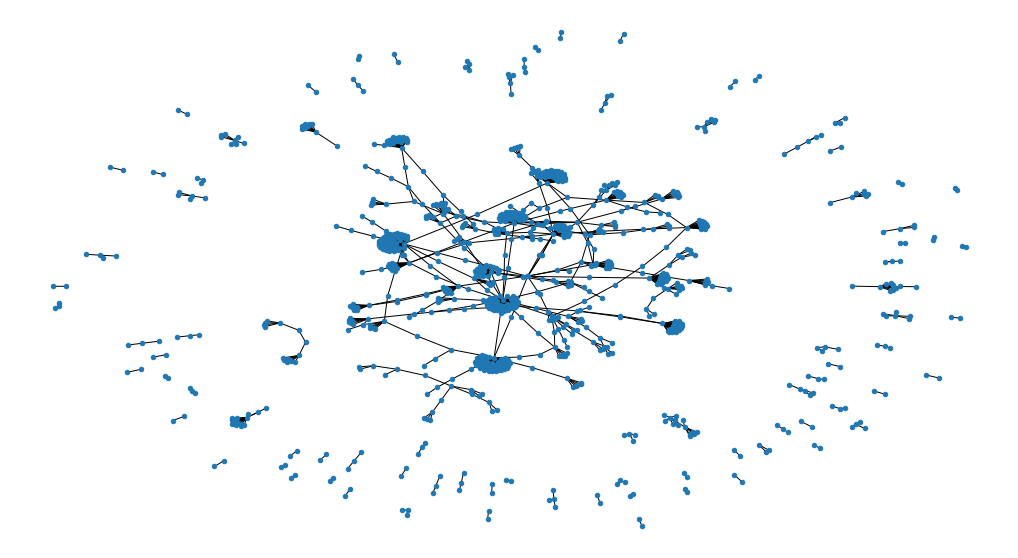

In [275]:
fig, ax = plt.subplots(figsize=(18,10))
nx.draw(sub_H, node_size=20, ax = ax)